In [25]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from ipynb.fs.full.id3_tests import reassign_classes
def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

In [27]:
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality)
wine_quality.data.features.info()
wine_quality.data.targets.info()
y = reassign_classes(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   qual

In [51]:
ranges = np.zeros([11,2])
for i in range(X.shape[1]):
    ranges[i,0] = min(X[:,i])
    ranges[i,1] = max(X[:,i])
    print(f" Values for {i}. min {min(X[:,i])} , max: {max(X[:,i])}")
#print(ranges)
# print(X[:,0])

 Values for 0. min 3.8 , max: 15.9
 Values for 1. min 0.08 , max: 1.58
 Values for 2. min 0.0 , max: 1.66
 Values for 3. min 0.6 , max: 65.8
 Values for 4. min 0.009 , max: 0.611
 Values for 5. min 1.0 , max: 289.0
 Values for 6. min 6.0 , max: 440.0
 Values for 7. min 0.98711 , max: 1.03898
 Values for 8. min 2.72 , max: 4.01
 Values for 9. min 0.22 , max: 2.0
 Values for 10. min 8.0 , max: 14.9
[7.4 7.8 7.8 ... 6.5 5.5 6. ]


In [101]:
def show_wine_data_scattering(number_of_sections):
    for i in range(X.shape[1]):
        labels = []
        values = []
        [mini, maxi] = ranges[i,:]
        step = (maxi - mini) / number_of_sections
        for k in range(number_of_sections):
            labels.append(f"<{(mini+k*step):.4f}:{(mini+(k+1)*step):.4f}>")
            values.append(sum(1 for x in X[:,i] if x <= mini+k*step))
        # print(values)
        for j in range(len(values)-1):
            values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
        # print(labels)
        # print(values)
        plt.bar(labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()

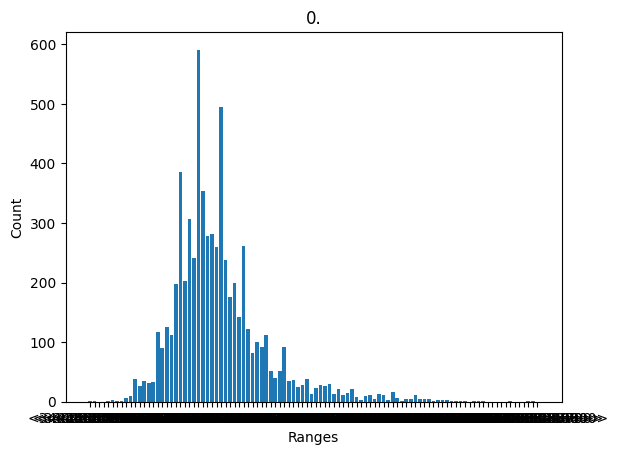

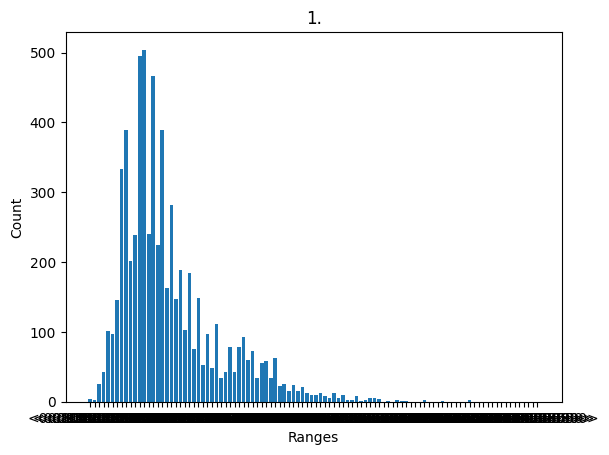

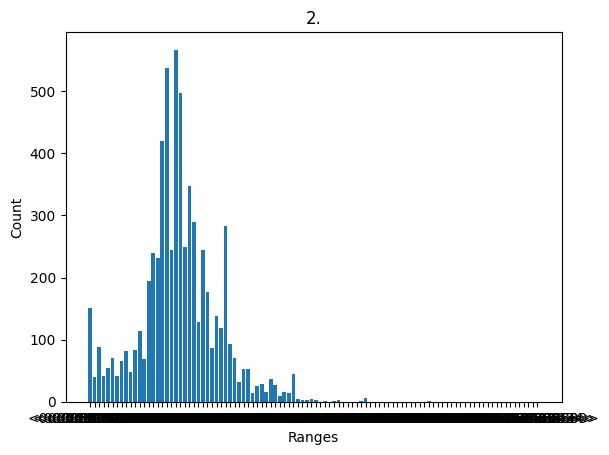

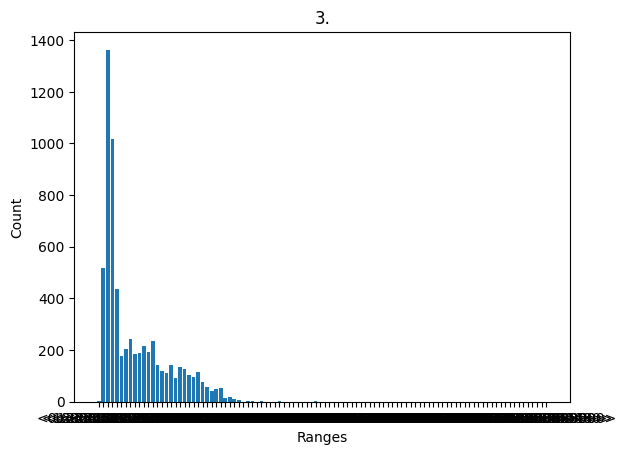

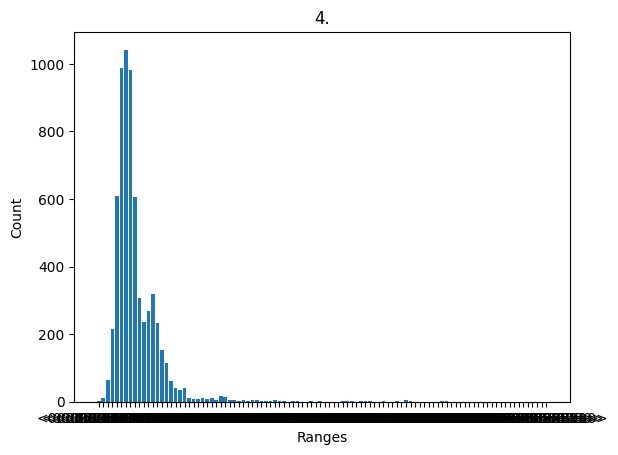

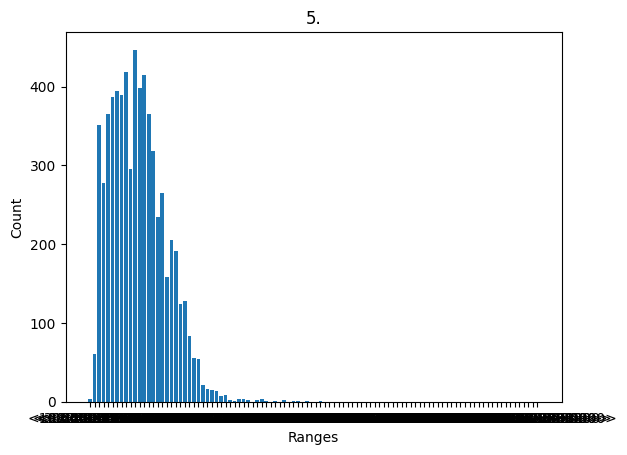

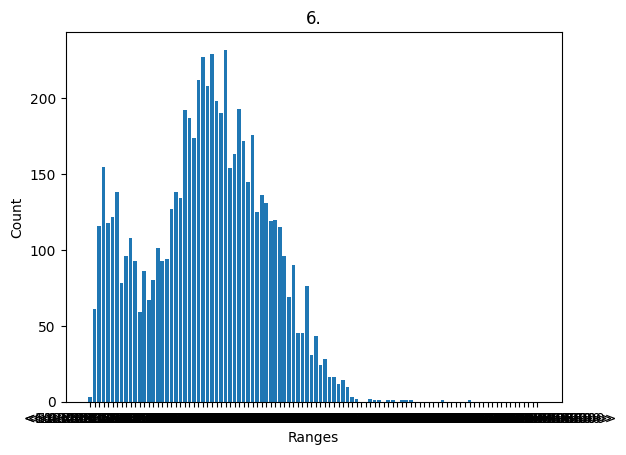

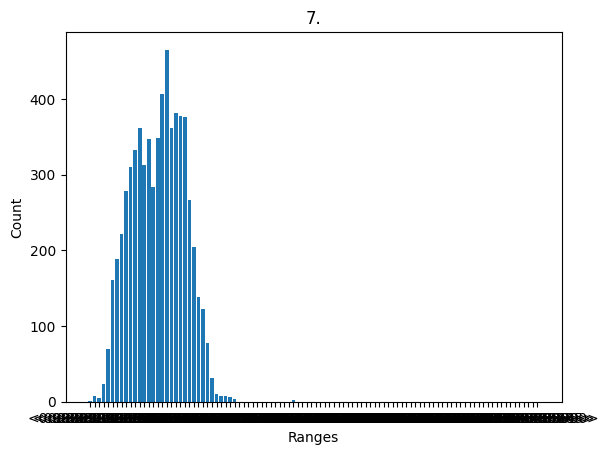

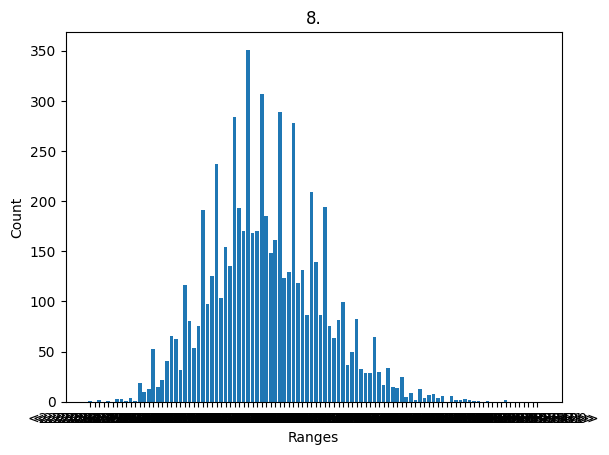

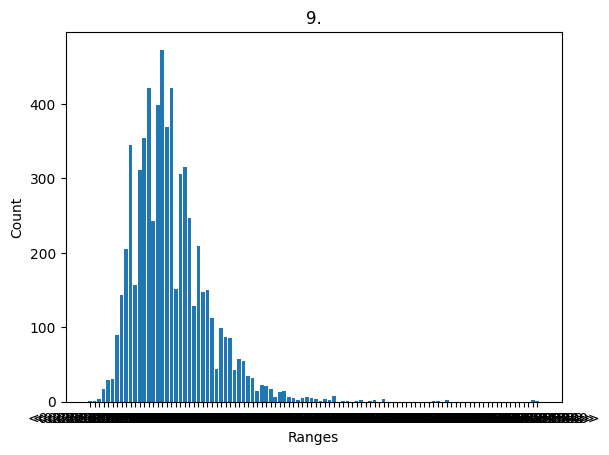

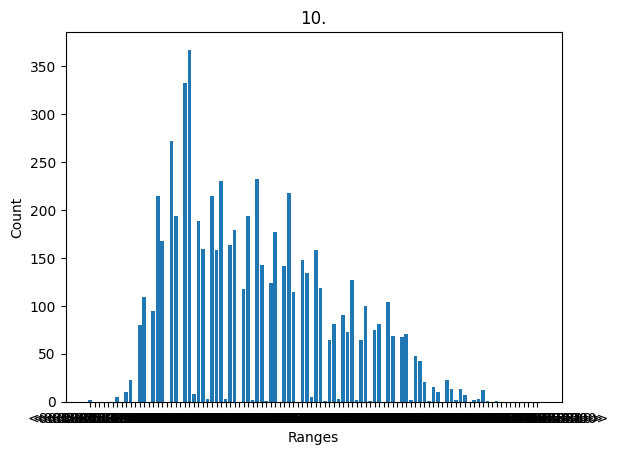

In [102]:
show_wine_data_scattering(100)